In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv(r"C:\Users\CSP\Downloads\Order.csv\Order.csv")

df.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Location,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,1101102016,Second Class,CG-12520,Claire Gute,Consumer,"United States,Henderson",Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,1101102016,Second Class,CG-12520,Claire Gute,Consumer,"United States,Henderson",Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,601602016,Second Class,DV-13045,Darrin Van Huff,Corporate,"United States,Los Angeles",California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,1001802015,Standard Class,SO-20335,Sean O'Donnell,Consumer,"United States,Fort Lauderdale",Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,1001802015,Standard Class,SO-20335,Sean O'Donnell,Consumer,"United States,Fort Lauderdale",Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
df.info()


Shape: (9994, 20)

Columns:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Location', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   int64  
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Location       9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null

# Data cleaning

In [21]:
df = df.drop_duplicates()


In [23]:
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Location         0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


# convert order date

In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


# create new columns

In [34]:
df['Month'] = df['Order Date'].dt.to_period('M')


In [36]:
monthly_summary = df.groupby('Month').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

monthly_summary.head()


,Month,Sales,Profit
0,2014-01,14236.895,2450.1907
1,2014-02,4519.892,862.3084
2,2014-03,55691.009,498.7299
3,2014-04,28295.345,3488.8352
4,2014-05,23648.287,2738.7096


# Top 5 Products by Sales

In [39]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

top_products


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

# Sales by Region

In [42]:
region_sales = df.groupby('Region')['Sales'].sum()

region_sales


Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

# Outlier Detection(iqr method)

In [55]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1


In [57]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [59]:
df_clean = df[(df['Sales'] >= lower_bound) & 
              (df['Sales'] <= upper_bound)]

print("Original rows:", df.shape[0])
print("After removing outliers:", df_clean.shape[0])


Original rows: 9994
After removing outliers: 8827


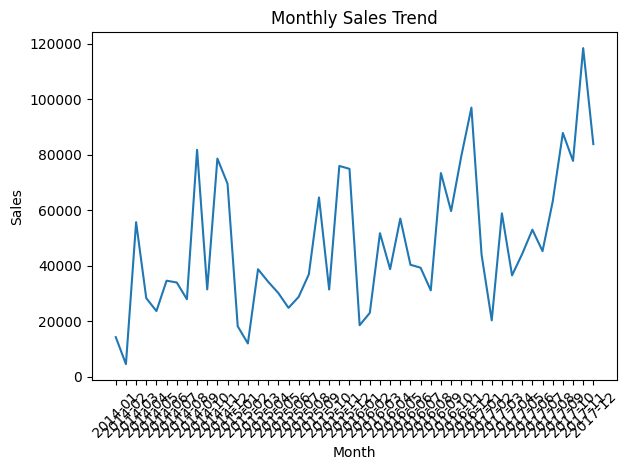

In [61]:
plt.figure()
plt.plot(monthly_summary['Month'].astype(str), monthly_summary['Sales'])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("monthly_sales_trend.png")
plt.show()


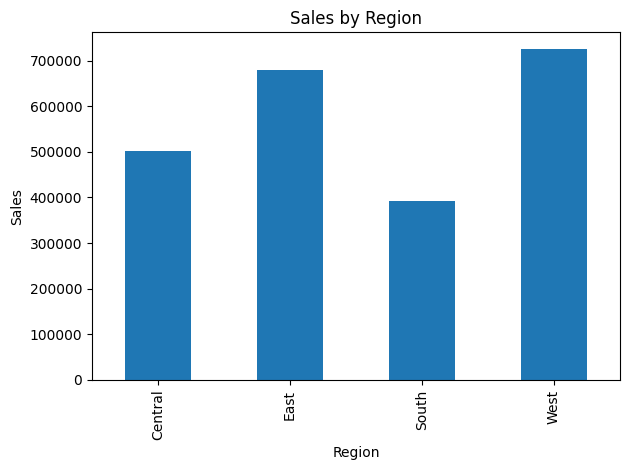

In [63]:
plt.figure()
region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("sales_by_region.png")
plt.show()


In [70]:
df_clean.to_csv("cleaned_sales_data.csv", index=False)


In [72]:
import os
print(os.getcwd())


C:\Users\CSP


In [76]:
df_clean.to_csv(r"C:/Users/CSP/Downloads/cleaned_sales_data.csv", index=False)
